### 6.2.1. One to One Sequence Problems

In [1]:
pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0rc3)


In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout,  Flatten, LSTM
from tensorflow.keras.models import Model

In [0]:


X1 = list()
X2 = list()

X = list()
y = list()

X1 = [(x+1)*4 for x in range(25)]
X2 = [(x+1)*5 for x in range(25)]

y = [x1*x2 for x1,x2 in zip(X1,X2)]

y = np.array(y)

In [5]:
X = np.column_stack((X1, X2))
print(X)
print(y)

[[  4   5]
 [  8  10]
 [ 12  15]
 [ 16  20]
 [ 20  25]
 [ 24  30]
 [ 28  35]
 [ 32  40]
 [ 36  45]
 [ 40  50]
 [ 44  55]
 [ 48  60]
 [ 52  65]
 [ 56  70]
 [ 60  75]
 [ 64  80]
 [ 68  85]
 [ 72  90]
 [ 76  95]
 [ 80 100]
 [ 84 105]
 [ 88 110]
 [ 92 115]
 [ 96 120]
 [100 125]]
[   20    80   180   320   500   720   980  1280  1620  2000  2420  2880
  3380  3920  4500  5120  5780  6480  7220  8000  8820  9680 10580 11520
 12500]


In [0]:
X = np.array(X).reshape(25, 1, 2)

In [7]:
print(X)

[[[  4   5]]

 [[  8  10]]

 [[ 12  15]]

 [[ 16  20]]

 [[ 20  25]]

 [[ 24  30]]

 [[ 28  35]]

 [[ 32  40]]

 [[ 36  45]]

 [[ 40  50]]

 [[ 44  55]]

 [[ 48  60]]

 [[ 52  65]]

 [[ 56  70]]

 [[ 60  75]]

 [[ 64  80]]

 [[ 68  85]]

 [[ 72  90]]

 [[ 76  95]]

 [[ 80 100]]

 [[ 84 105]]

 [[ 88 110]]

 [[ 92 115]]

 [[ 96 120]]

 [[100 125]]]


In [8]:
input_layer = Input(shape = (1,2))
lstm1 = LSTM(100, activation='relu', return_sequences=True)(input_layer)
lstm2 = LSTM(50, activation='relu', return_sequences=True)(lstm1)
lstm3 = LSTM(25, activation='relu') (lstm2)
dense1 = Dense(10, activation='relu')(lstm3)
output_layer = Dense(1)(dense1)
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')

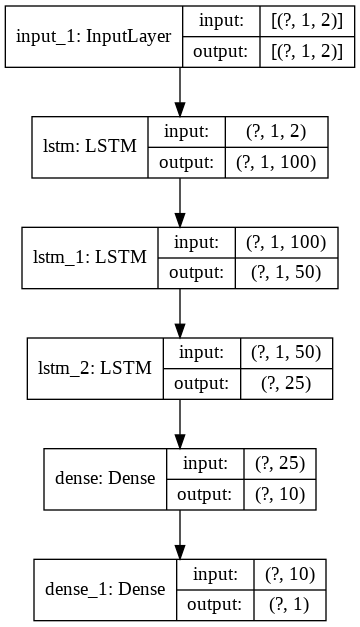

In [9]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [10]:
model_history = model.fit(X, y, epochs=1000, verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 34458644.0000
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 34458216.0000
Epoch 3/1000
1/1 [==============================] - 0s 779us/step - loss: 34457824.0000
Epoch 4/1000
1/1 [==============================] - 0s 778us/step - loss: 34457424.0000
Epoch 5/1000
1/1 [==============================] - 0s 835us/step - loss: 34457052.0000
Epoch 6/1000
1/1 [==============================] - 0s 738us/step - loss: 34456660.0000
Epoch 7/1000
1/1 [==============================] - 0s 732us/step - loss: 34456172.0000
Epoch 8/1000
1/1 [==============================] - 0s 806us/step - loss: 34455568.0000
Epoch 9/1000
1/1 [==============================] - 0s 784us/step - loss: 34454868.0000
Epoch 10/1000
1/1 [==============================] - 0s 809us/step - loss: 34454076.0000
Epoch 11/1000
1/1 [==============================] - 0s 782us/step - loss: 34453152.0000
Epoch 12/1000
1/1 [===============

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


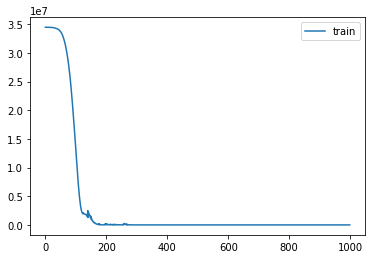

In [11]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label = 'loss')
plt.legend(['train'], loc='top right')

In [12]:
X_test = np.array([104,130]) # 13520
X_test = X_test.reshape((1, 1, 2))
y_pred = model.predict(X_test, verbose=0)
print(y_pred)

[[13340.499]]




### 6.2.2. Many to One Sequence Problems

In [13]:
X1 = np.array([x+4 for x in range(0, 160, 4)])
print(X1)

X2 = np.array([x+5 for x in range(0, 200, 5)])
print(X2)

[  4   8  12  16  20  24  28  32  36  40  44  48  52  56  60  64  68  72
  76  80  84  88  92  96 100 104 108 112 116 120 124 128 132 136 140 144
 148 152 156 160]
[  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175 180
 185 190 195 200]


In [14]:
X = np.column_stack((X1, X2))
print(X)

[[  4   5]
 [  8  10]
 [ 12  15]
 [ 16  20]
 [ 20  25]
 [ 24  30]
 [ 28  35]
 [ 32  40]
 [ 36  45]
 [ 40  50]
 [ 44  55]
 [ 48  60]
 [ 52  65]
 [ 56  70]
 [ 60  75]
 [ 64  80]
 [ 68  85]
 [ 72  90]
 [ 76  95]
 [ 80 100]
 [ 84 105]
 [ 88 110]
 [ 92 115]
 [ 96 120]
 [100 125]
 [104 130]
 [108 135]
 [112 140]
 [116 145]
 [120 150]
 [124 155]
 [128 160]
 [132 165]
 [136 170]
 [140 175]
 [144 180]
 [148 185]
 [152 190]
 [156 195]
 [160 200]]


In [15]:
X = np.array(X).reshape(20, 2, 2)
print(X)

[[[  4   5]
  [  8  10]]

 [[ 12  15]
  [ 16  20]]

 [[ 20  25]
  [ 24  30]]

 [[ 28  35]
  [ 32  40]]

 [[ 36  45]
  [ 40  50]]

 [[ 44  55]
  [ 48  60]]

 [[ 52  65]
  [ 56  70]]

 [[ 60  75]
  [ 64  80]]

 [[ 68  85]
  [ 72  90]]

 [[ 76  95]
  [ 80 100]]

 [[ 84 105]
  [ 88 110]]

 [[ 92 115]
  [ 96 120]]

 [[100 125]
  [104 130]]

 [[108 135]
  [112 140]]

 [[116 145]
  [120 150]]

 [[124 155]
  [128 160]]

 [[132 165]
  [136 170]]

 [[140 175]
  [144 180]]

 [[148 185]
  [152 190]]

 [[156 195]
  [160 200]]]


In [0]:
y = [sum (y) for y in [sum(x) for x in X]]
y = np.array(y)

In [17]:

print(y)

[ 27  63  99 135 171 207 243 279 315 351 387 423 459 495 531 567 603 639
 675 711]


In [18]:
input_layer = Input(shape = (2,2))
lstm1 = LSTM(100, activation='relu', return_sequences=True)(input_layer)
lstm2 = LSTM(50, activation='relu', return_sequences=True)(lstm1)
lstm3 = LSTM(25, activation='relu') (lstm2)
dense1 = Dense(10, activation='relu')(lstm3)
output_layer = Dense(1)(dense1)
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')

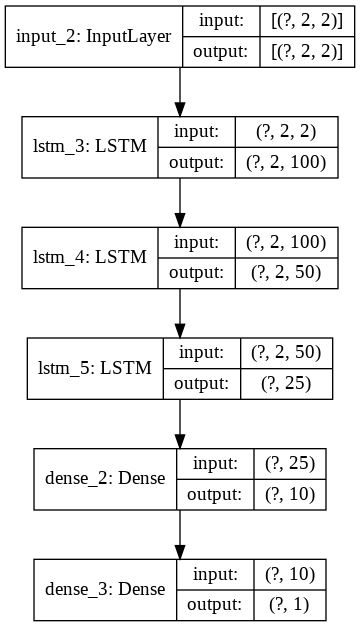

In [19]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [20]:
model_history = model.fit(X, y, epochs=1000, verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 179024.2656
Epoch 2/1000
1/1 [==============================] - 0s 854us/step - loss: 178814.6250
Epoch 3/1000
1/1 [==============================] - 0s 788us/step - loss: 178560.5938
Epoch 4/1000
1/1 [==============================] - 0s 810us/step - loss: 178265.0469
Epoch 5/1000
1/1 [==============================] - 0s 874us/step - loss: 177932.0312
Epoch 6/1000
1/1 [==============================] - 0s 870us/step - loss: 177563.1406
Epoch 7/1000
1/1 [==============================] - 0s 798us/step - loss: 177160.5156
Epoch 8/1000
1/1 [==============================] - 0s 759us/step - loss: 176718.5312
Epoch 9/1000
1/1 [==============================] - 0s 733us/step - loss: 176229.7656
Epoch 10/1000
1/1 [==============================] - 0s 771us/step - loss: 175689.0469
Epoch 11/1000
1/1 [==============================] - 0s 759us/step - loss: 175095.8750
Epoch 12/1000
1/1 [==============================] - 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


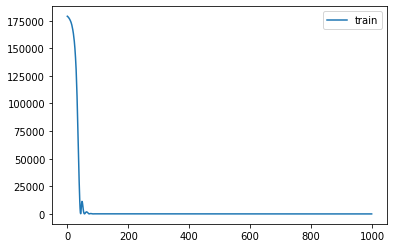

In [21]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label = 'loss')
plt.legend(['train'], loc='top right')

In [22]:
X_test = np.array([[200, 225], ## 859
                    [204,230]])
X_test = X_test.reshape((1, 2, 2))
y_pred = model.predict(X_test, verbose=0)
print(y_pred)

[[862.1349]]


## One to Many Sequence Problems

In [23]:

X1 = list()
X2 = list()

X = list()
y = list()

X1 = [(x+1)*6 for x in range(30)]
X2 = [(x+1)*7 for x in range(30)]

for x1, x2 in zip(X1, X2):
    output = list()
    output.append(x1-2)
    output.append(x2-3)
    y.append(output)

X = np.column_stack((X1, X2))
print(X)

[[  6   7]
 [ 12  14]
 [ 18  21]
 [ 24  28]
 [ 30  35]
 [ 36  42]
 [ 42  49]
 [ 48  56]
 [ 54  63]
 [ 60  70]
 [ 66  77]
 [ 72  84]
 [ 78  91]
 [ 84  98]
 [ 90 105]
 [ 96 112]
 [102 119]
 [108 126]
 [114 133]
 [120 140]
 [126 147]
 [132 154]
 [138 161]
 [144 168]
 [150 175]
 [156 182]
 [162 189]
 [168 196]
 [174 203]
 [180 210]]


In [24]:
print(y)

[[4, 4], [10, 11], [16, 18], [22, 25], [28, 32], [34, 39], [40, 46], [46, 53], [52, 60], [58, 67], [64, 74], [70, 81], [76, 88], [82, 95], [88, 102], [94, 109], [100, 116], [106, 123], [112, 130], [118, 137], [124, 144], [130, 151], [136, 158], [142, 165], [148, 172], [154, 179], [160, 186], [166, 193], [172, 200], [178, 207]]


In [0]:
X = np.array(X).reshape(30, 1, 2)
y = np.array(y)

In [26]:
input_layer = Input(shape = (1,2))
lstm1 = LSTM(100, activation='relu', return_sequences=True)(input_layer)
lstm2 = LSTM(50, activation='relu', return_sequences=True)(lstm1)
lstm3 = LSTM(25, activation='relu') (lstm2)
dense1 = Dense(10, activation='relu')(lstm3)
output_layer = Dense(2)(dense1)
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')

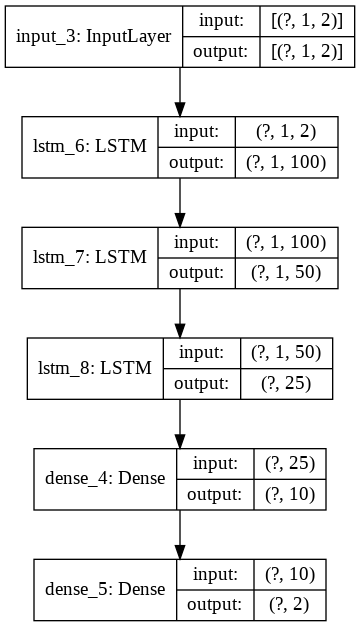

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [28]:
model_history = model.fit(X, y, epochs=1000, verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 12886.7871
Epoch 2/1000
1/1 [==============================] - 0s 803us/step - loss: 12882.3330
Epoch 3/1000
1/1 [==============================] - 0s 802us/step - loss: 12877.8379
Epoch 4/1000
1/1 [==============================] - 0s 767us/step - loss: 12873.0635
Epoch 5/1000
1/1 [==============================] - 0s 735us/step - loss: 12867.5000
Epoch 6/1000
1/1 [==============================] - 0s 733us/step - loss: 12861.7461
Epoch 7/1000
1/1 [==============================] - 0s 819us/step - loss: 12856.5684
Epoch 8/1000
1/1 [==============================] - 0s 723us/step - loss: 12850.2725
Epoch 9/1000
1/1 [==============================] - 0s 874us/step - loss: 12842.7998
Epoch 10/1000
1/1 [==============================] - 0s 802us/step - loss: 12834.1436
Epoch 11/1000
1/1 [==============================] - 0s 790us/step - loss: 12824.2188
Epoch 12/1000
1/1 [==============================] - 0s 894us/ste

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


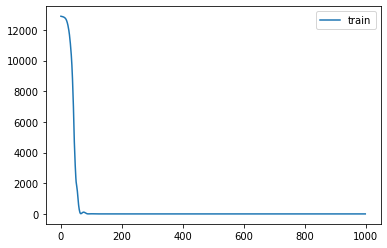

In [29]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label = 'loss')
plt.legend(['train'], loc='top right')

In [30]:
X_test = np.array([300, 350])
X_test = X_test.reshape((1, 1, 2))
y_pred = model.predict(X_test, verbose=0)
print(y_pred)

[[295.98697 343.944  ]]


## Many to Many Sequence Problems

In [0]:
X = list()
y = list()
X1 = [x1 for x1 in range(6, 361, 6)]
X2 = [x2 for x2 in range(7, 421, 7)]
y = [y for y in range(36, 391, 6)]



In [0]:
X = np.column_stack((X1, X2))
y= np.array(y)

In [33]:
X

array([[  6,   7],
       [ 12,  14],
       [ 18,  21],
       [ 24,  28],
       [ 30,  35],
       [ 36,  42],
       [ 42,  49],
       [ 48,  56],
       [ 54,  63],
       [ 60,  70],
       [ 66,  77],
       [ 72,  84],
       [ 78,  91],
       [ 84,  98],
       [ 90, 105],
       [ 96, 112],
       [102, 119],
       [108, 126],
       [114, 133],
       [120, 140],
       [126, 147],
       [132, 154],
       [138, 161],
       [144, 168],
       [150, 175],
       [156, 182],
       [162, 189],
       [168, 196],
       [174, 203],
       [180, 210],
       [186, 217],
       [192, 224],
       [198, 231],
       [204, 238],
       [210, 245],
       [216, 252],
       [222, 259],
       [228, 266],
       [234, 273],
       [240, 280],
       [246, 287],
       [252, 294],
       [258, 301],
       [264, 308],
       [270, 315],
       [276, 322],
       [282, 329],
       [288, 336],
       [294, 343],
       [300, 350],
       [306, 357],
       [312, 364],
       [318,

In [34]:
y

array([ 36,  42,  48,  54,  60,  66,  72,  78,  84,  90,  96, 102, 108,
       114, 120, 126, 132, 138, 144, 150, 156, 162, 168, 174, 180, 186,
       192, 198, 204, 210, 216, 222, 228, 234, 240, 246, 252, 258, 264,
       270, 276, 282, 288, 294, 300, 306, 312, 318, 324, 330, 336, 342,
       348, 354, 360, 366, 372, 378, 384, 390])

In [0]:
X = np.array(X).reshape(20, 3, 2)
y = np.array(y).reshape(20, 3, 1)

In [36]:
X

array([[[  6,   7],
        [ 12,  14],
        [ 18,  21]],

       [[ 24,  28],
        [ 30,  35],
        [ 36,  42]],

       [[ 42,  49],
        [ 48,  56],
        [ 54,  63]],

       [[ 60,  70],
        [ 66,  77],
        [ 72,  84]],

       [[ 78,  91],
        [ 84,  98],
        [ 90, 105]],

       [[ 96, 112],
        [102, 119],
        [108, 126]],

       [[114, 133],
        [120, 140],
        [126, 147]],

       [[132, 154],
        [138, 161],
        [144, 168]],

       [[150, 175],
        [156, 182],
        [162, 189]],

       [[168, 196],
        [174, 203],
        [180, 210]],

       [[186, 217],
        [192, 224],
        [198, 231]],

       [[204, 238],
        [210, 245],
        [216, 252]],

       [[222, 259],
        [228, 266],
        [234, 273]],

       [[240, 280],
        [246, 287],
        [252, 294]],

       [[258, 301],
        [264, 308],
        [270, 315]],

       [[276, 322],
        [282, 329],
        [288, 336]],

       [

In [37]:
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed

input_layer = Input(shape = (3,2))
lstm1 = LSTM(100, activation='relu')(input_layer)
rv = RepeatVector(3)(lstm1)
lstm2 = LSTM(100, activation='relu', return_sequences=True)(rv)
output_layer =  TimeDistributed(Dense(1))(lstm2)
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')

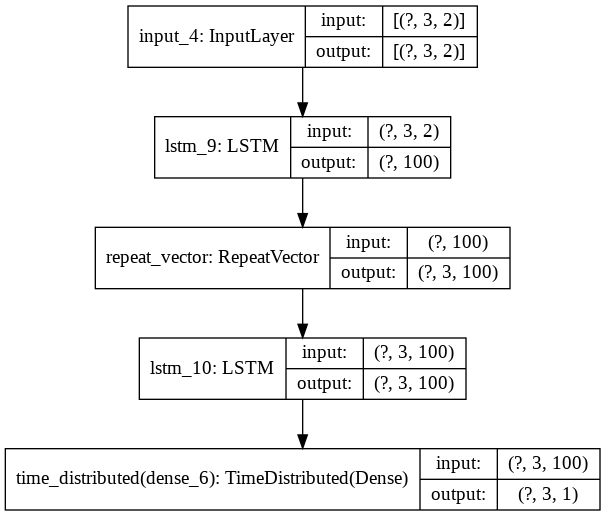

In [38]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [39]:
model_history = model.fit(X, y, epochs=1000, verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 58858.6758
Epoch 2/1000
1/1 [==============================] - 0s 920us/step - loss: 54121.7266
Epoch 3/1000
1/1 [==============================] - 0s 787us/step - loss: 48476.6094
Epoch 4/1000
1/1 [==============================] - 0s 795us/step - loss: 46409.8477
Epoch 5/1000
1/1 [==============================] - 0s 774us/step - loss: 44293.9844
Epoch 6/1000
1/1 [==============================] - 0s 1ms/step - loss: 40439.7070
Epoch 7/1000
1/1 [==============================] - 0s 746us/step - loss: 37452.5078
Epoch 8/1000
1/1 [==============================] - 0s 780us/step - loss: 33724.0586
Epoch 9/1000
1/1 [==============================] - 0s 731us/step - loss: 29531.2207
Epoch 10/1000
1/1 [==============================] - 0s 764us/step - loss: 23137.3867
Epoch 11/1000
1/1 [==============================] - 0s 751us/step - loss: 18528.9922
Epoch 12/1000
1/1 [==============================] - 0s 812us/step 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


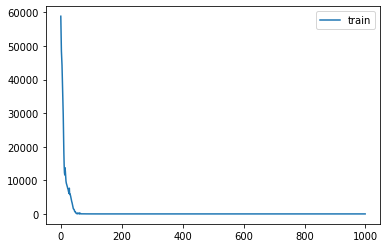

In [40]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'], label = 'loss')
plt.legend(['train'], loc='top right')

In [41]:
X1 = [600, 606, 612]
X2 = [700, 707, 714]

X_test = np.column_stack((X1, X2))
X_test = X_test.reshape((1, 3, 2))
y_pred = model.predict(X_test, verbose=0)
print(y_pred)


[[[639.74927]
  [644.72095]
  [654.4165 ]]]


## Exercise 6.1

### Question 1:

The shape of the feature set passed to the LSTM's input layer should be:

1. Number of Records, Features, Timesteps
2. Timesteps, Features, Number of Records
3. Features, Timesteps, Number of Records
4. Number of Records, Timesteps, Features

Answer: 4


### Question 2:
To connect the encoder with decoder layer in many to many sequence problems, which layer is used:

1. Time distributed
2. Repeat vector
3. Dense
4. Softmax

Answer: 2

### Question 3:

Image to text description is an example of:

1. One to One Sequence Problems
2. Many to One Sequence Problems
3. Many to Many Sequence Problems
4. One to Many Sequence Problems

Answer: 4


## Exercise 6.2

Using the facebook training and testing data provided in the dataset, predict the closing stock price of the Facebook company for the next day. 

**Solution**


In [44]:
import pandas as pd
import numpy as np
fb_complete_data = pd.read_csv("/content/fb_train.csv")

fb_training_processed = fb_complete_data[['Close']].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

fb_training_scaled = scaler.fit_transform(fb_training_processed)

fb_training_features= []
fb_training_labels = []
for i in range(60, len(fb_training_scaled)):
    fb_training_features.append(fb_training_scaled[i-60:i, 0])
    fb_training_labels.append(fb_training_scaled[i, 0])

X_train = np.array(fb_training_features)
y_train = np.array(fb_training_labels)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout,  Flatten, LSTM
from tensorflow.keras.models import Model




input_layer = Input(shape = (X_train.shape[1], 1))
lstm1 = LSTM(100, activation='relu', return_sequences=True)(input_layer)
do1 = Dropout(0.2)(lstm1)
lstm2 = LSTM(100, activation='relu', return_sequences=True)(do1)
do2 = Dropout(0.2)(lstm2)
lstm3 = LSTM(100, activation='relu', return_sequences=True)(do2)
do3 = Dropout(0.2)(lstm3)
lstm4 = LSTM(100, activation='relu')(do3)
do4 = Dropout(0.2)(lstm4)

output_layer = Dense(1)(do4)
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mse')

print(X_train.shape)
print(y_train.shape)
y_train= y_train.reshape(-1,1)
print(y_train.shape)

model_history = model.fit(X_train, y_train, epochs=100, verbose=1, batch_size = 32)

(1197, 60, 1)
(1197,)
(1197, 1)
Epoch 1/100
38/38 [==============================] - 12s 311ms/step - loss: 0.0571
Epoch 2/100
38/38 [==============================] - 12s 311ms/step - loss: 0.0069
Epoch 3/100
38/38 [==============================] - 12s 313ms/step - loss: 0.0065
Epoch 4/100
38/38 [==============================] - 12s 310ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 12s 309ms/step - loss: 0.0061
Epoch 6/100
38/38 [==============================] - 12s 310ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 12s 303ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 12s 304ms/step - loss: 0.0047
Epoch 9/100
38/38 [==============================] - 11s 300ms/step - loss: 0.0050
Epoch 10/100
38/38 [==============================] - 11s 302ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 11s 300ms/step - loss: 0.0051
Epoch 12/100
38/38 [==============================] -

In [46]:
fb_testing_complete_data = pd.read_csv("/content/fb_test.csv")
fb_testing_processed = fb_testing_complete_data[['Close']].values

fb_all_data = pd.concat((fb_complete_data['Close'], fb_testing_complete_data['Close']), axis=0)

test_inputs = fb_all_data [len(fb_all_data ) - len(fb_testing_complete_data) - 60:].values
print(test_inputs.shape)

test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
print(test_inputs.shape)

fb_test_features = []
for i in range(60, 80):
    fb_test_features.append(test_inputs[i-60:i, 0])

X_test = np.array(fb_test_features)
print(X_test.shape)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

y_pred =  model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

(80,)
(80, 1)
(20, 60)
(20, 60, 1)


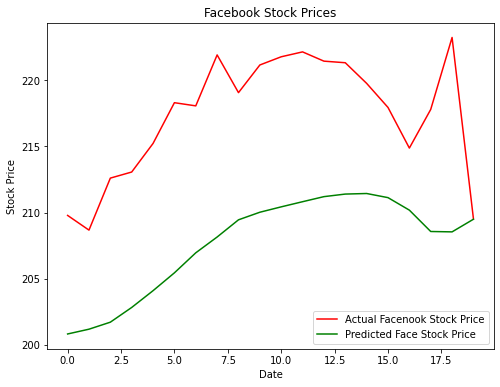

In [47]:
plt.figure(figsize=(8,6))
plt.plot(fb_testing_processed, color='red', label='Actual Facenook Stock Price')
plt.plot(y_pred , color='green', label='Predicted Face Stock Price')
plt.title('Facebook Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
